In [121]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import scienceplots
%matplotlib inline

In [122]:
# Data main figures
df = pd.read_csv("data/variogram.csv") 
Bs = pd.read_csv("data/Bs.csv")

In [123]:
# Data inset
B1_data = np.genfromtxt("data/spectra1.txt")
B2_data = np.genfromtxt("data/spectra2.txt")
B3_data = np.genfromtxt("data/spectra3.txt")
B4_data = np.genfromtxt("data/spectra4.txt")
B5_data = np.genfromtxt("data/spectra5.txt")
b1x, b1y = B1_data[:,0], B1_data[:,1]
b2x, b2y = B2_data[:,0], B2_data[:,1]
b3x, b3y = B3_data[:,0], B3_data[:,1]
b4x, b4y = B4_data[:,0], B4_data[:,1]
b5x, b5y = B5_data[:,0], B5_data[:,1]

In [124]:
# Make the data match the order of the other figures for the first 5 buffers
B_values = Bs["Bs"].values
B_values = B_values[::-1]
B_values = np.hstack([B_values[1:], B_values[:1]])

# Make the data match the order of the other figures for the first 5 buffers
y_values = np.array([df[f"B{i}"] for i in range(1,7)])
y_values = y_values[::-1, :]
y_values = np.vstack([y_values[1:, :], y_values[:1, :]])


In [125]:
# Using a standardized style set that largely holds to Nature's guidelines.
plt.style.use('science')
plt.style.use(['nature'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

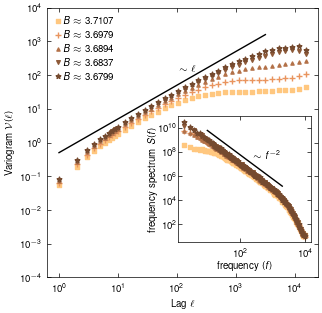

In [208]:
# Get the normal fig width
width = 3.5
fig, ax1 = plt.subplots(figsize = (width, width) )
size=4

norm = plt.Normalize(min(B_values[:-1])*0.995, max(B_values[:-1]))
colors = plt.cm.copper(norm(B_values))
colors[-1] = plt.cm.copper(1.0)
norm = matplotlib.colors.SymLogNorm(linthresh=0.01, vmin=min(B_values), vmax=max(B_values))

ax1.scatter(df["lag"], y_values[4], linewidth=1, c=colors[4], label=fr"$B \approx {str(B_values[4])[:6]}$", s=2*size, marker="s")
ax1.scatter(df["lag"], y_values[3], linewidth=1, c=colors[3], label=fr"$B \approx {str(B_values[3])[:6]}$", s=5*size, marker="+")
ax1.scatter(df["lag"], y_values[2], linewidth=1, c=colors[2], label=fr"$B \approx {str(B_values[2])[:6]}$", s=1.3*size, marker="^")
ax1.scatter(df["lag"], y_values[1], linewidth=1, c=colors[1], label=fr"$B \approx{str(B_values[1])[:6]}$", s=1.7*size, marker="v")
ax1.scatter(df["lag"], y_values[0], linewidth=1, c=colors[0], label=fr"$B \approx {str(B_values[0])[:6]}$", s=3*size, marker="*")

# scale
ax1.set_xscale("log")
ax1.set_yscale("log")

x = df["lag"].values
y = df["lag"].values / 2
cutoff = 7
ax1.plot(x[:-cutoff], y[:-cutoff], color="black", alpha=1)
ax1.text(0.55, 0.79, r"$\sim \ell$", transform=ax1.transAxes,
        horizontalalignment='right', verticalalignment='top')

# labels
ax1.set_xlabel(r"Lag $\ell$") 
ax1.set_ylabel(r"Variogram $\mathcal{V}(\ell)$")

# axes
ax1.yaxis.set_tick_params(direction="in")
ax1.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))
ax1.xaxis.set_tick_params(direction="in")
ax1.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))
ax1.tick_params(axis='x', which='both', pad=5)
ax1.set_ylim(1E-4, 1E4)

# legend
ax1.legend(frameon=False, loc="upper left", bbox_to_anchor=(0,1),handlelength=.5, handletextpad=0.3)

# Figure 2
left, bottom, width, height = [0.5, 0.21, 0.38, 0.36]
ax2 = fig.add_axes([left, bottom, width, height])
# Create the colormap
Bc = 3.6755

# Set colors
ax2.scatter(b1x, b1y**2, label=fr"$B \approx {str(B_values[4])[:6]}$", s=2*size, c=colors[4], marker="s")
ax2.scatter(b2x, b2y**2, label=fr"$B \approx {str(B_values[3])[:6]}$", s=5*size, c=colors[3], marker="+")
ax2.scatter(b3x, b3y**2, label=fr"$B \approx {str(B_values[2])[:6]}$", s=1.3*size, c=colors[2], marker="^")
ax2.scatter(b4x, b4y**2, label=fr"$B \approx {str(B_values[1])[:6]}$", s=1.7*size, c=colors[1], marker="v")
ax2.scatter(b5x, b5y**2, label=fr"$B \approx {str(B_values[0])[:6]}$", s=3*size, c=colors[0], marker="*")


xes = [10, 2000]
ys = [2*54000**2, 2*270**2]

ax2.plot(xes, ys, c="black")

# scale
ax2.set_xscale("log")
ax2.set_yscale("log")

# labels
ax2.set_xlabel(r"$\mathrm{frequency\ }(f)$", labelpad=2)
ax2.set_ylabel(r"$\mathrm{frequency\ spectrum}\ S(f)$", labelpad=1)

# axes
ax2.yaxis.set_tick_params(direction="in", pad=1)
ax2.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))
ax2.xaxis.set_tick_params(direction="in")
ax2.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))
ax2.tick_params(axis='x', which='both', pad=5)


# annotation
ax2.text(0.77, 0.72, r"$\sim f^{-2}$", transform=ax2.transAxes,
        horizontalalignment='right', verticalalignment='top')


fig.savefig("variogram.pdf")

